In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import statsmodels.formula.api as smf 


In [2]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/4_SLR/delivery_time.csv")

In [3]:
dataset.head()

,Sorting_Time,Delivery_Time
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sorting_Time   21 non-null     int64  
 1   Delivery_Time  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.dtypes

Sorting_Time       int64
Delivery_Time    float64
dtype: object

In [6]:
dataset.isnull().sum()

Sorting_Time     0
Delivery_Time    0
dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

Text(0.5, 1.0, "Q-Q plot of 'Delivery_Time'")

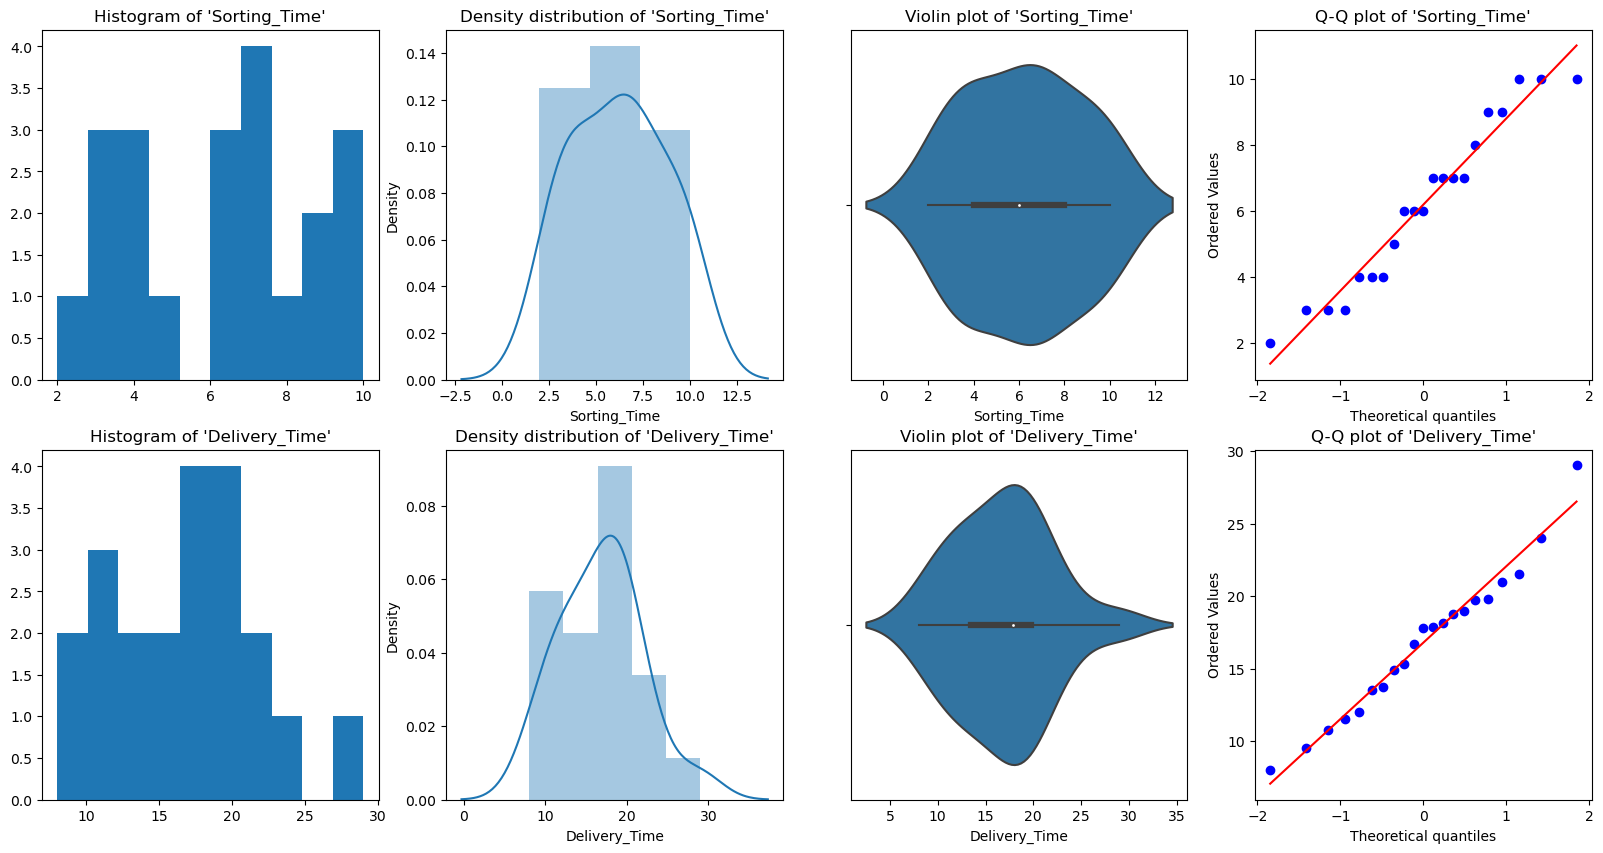

In [7]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Sorting_Time'], density=False)
plt.title("Histogram of 'Sorting_Time'")
plt.subplot(2,4,5)
plt.hist(dataset['Delivery_Time'], density=False)
plt.title("Histogram of 'Delivery_Time'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Sorting_Time'], kde=True)
plt.title("Density distribution of 'Sorting_Time'")
plt.subplot(2,4,6)
sns.distplot(dataset['Delivery_Time'], kde=True)
plt.title("Density distribution of 'Delivery_Time'")


# boxplot or violin plot
plt.subplot(2,4,3)
sns.violinplot(dataset['Sorting_Time'])
plt.title("Violin plot of 'Sorting_Time'")
plt.subplot(2,4,7)
sns.violinplot(dataset['Delivery_Time'])
plt.title("Violin plot of 'Delivery_Time'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Sorting_Time'], plot=plt)
plt.title("Q-Q plot of 'Sorting_Time'")
plt.subplot(2,4,8)
probplot(dataset['Delivery_Time'], plot=plt)
plt.title("Q-Q plot of 'Delivery_Time'")

Text(0.5, 1.0, 'Line Plot')

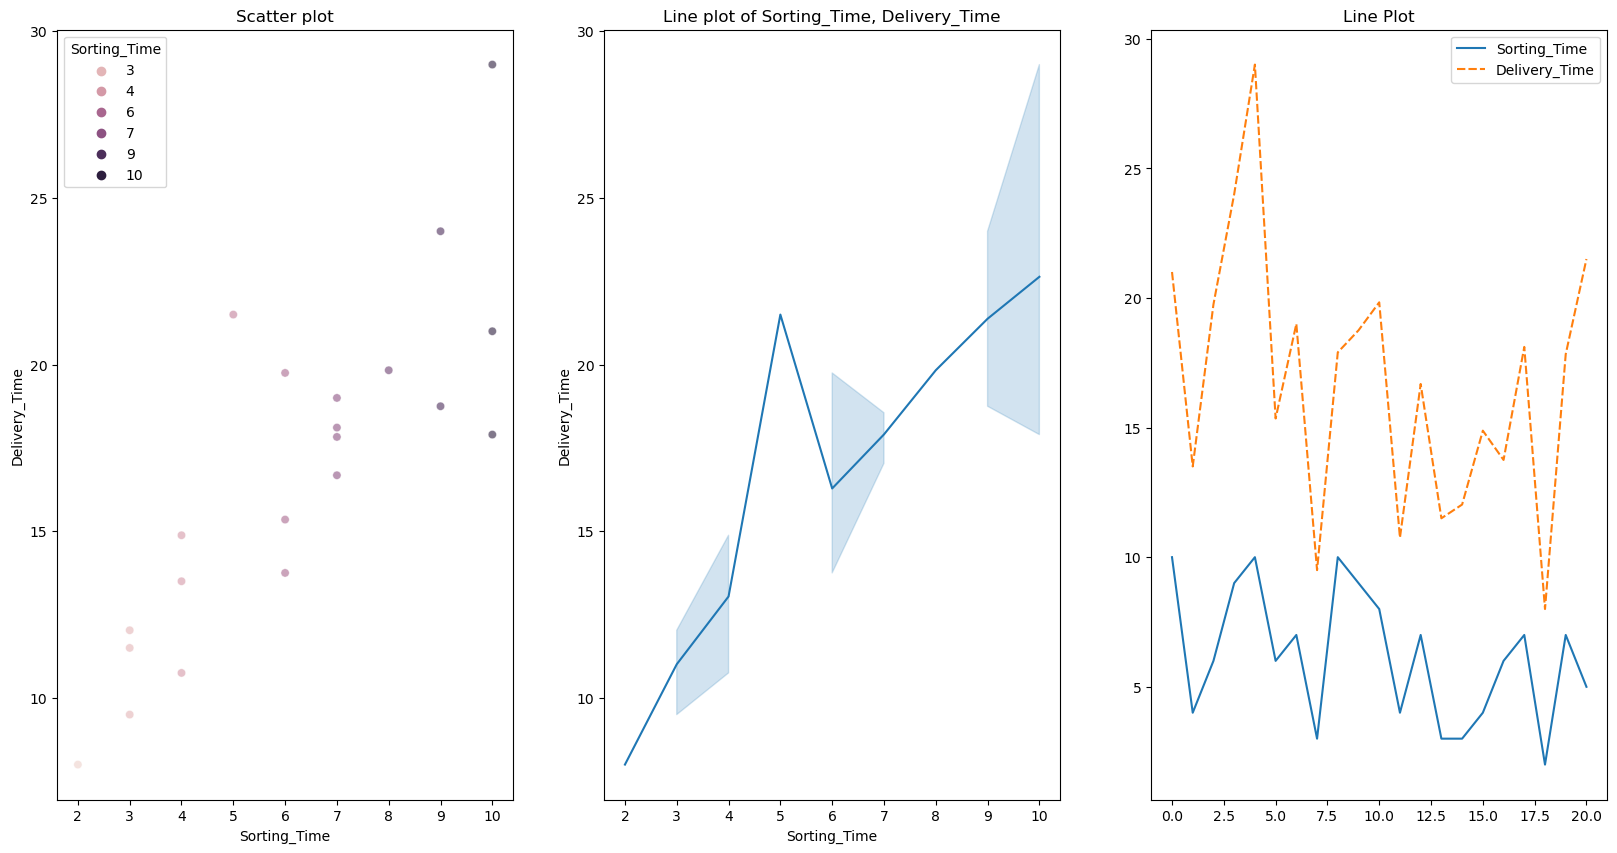

In [8]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=dataset, x="Sorting_Time", y="Delivery_Time", hue="Sorting_Time", alpha=0.6)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data=dataset, x="Sorting_Time", y="Delivery_Time")
plt.title("Line plot of Sorting_Time, Delivery_Time")
plt.subplot(1,3,3)
sns.lineplot(data=dataset)
plt.title('Line Plot')

Text(0.5, 1.0, 'Joint plot')

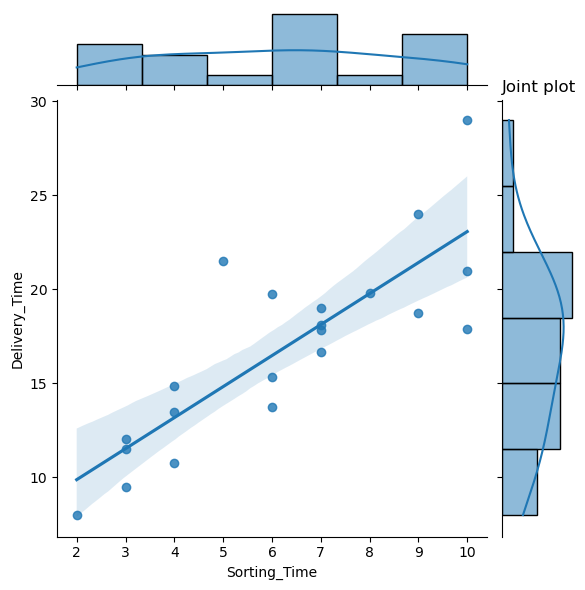

In [9]:
# Joint plot
sns.jointplot(x = "Sorting_Time", y = "Delivery_Time", kind = "reg", data = dataset)
plt.title("Joint plot")

In [10]:
# correlation
print("Correlation: "+ 'n', dataset.corr()) 


Correlation: n                Sorting_Time  Delivery_Time
Sorting_Time       1.000000       0.825997
Delivery_Time      0.825997       1.000000


In [11]:
#data transformation
dataset_log = np.log(dataset)#log transformation
dataset_sqrt = np.sqrt(dataset)#square root transformation
dataset_cbrt = np.cbrt(dataset)#cube root transformaton
# dataset_arcsin = np.arcsin(dataset)
dataset_sqr = np.square(dataset)
# dataset_clip = np.clip(dataset)
dataset_exp = np.exp(dataset)

In [12]:
def model(dataset,testSize=0.2):
    X = dataset.iloc[:,:-1].values # independant variables
    y = dataset.iloc[:,-1].values ## dependant variable
    #train test data split
    from sklearn.model_selection import train_test_split    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= testSize, random_state=0)
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(X_train,Y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score

    mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_true=Y_test,y_pred=y_pred)
    rsquare = r2_score(y_true=Y_test, y_pred=y_pred)

    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    print("Rsquare:", rsquare)
#     return reg


In [13]:
def smf_ols(dataset):
    x = dataset.iloc[:,:-1] # independent variables
    y = dataset.iloc[:,-1] # dependent varible
    #print(X)
    model = smf.ols('y~x', data=dataset).fit()
    print(model.summary())
    return model
# smf_ols(dataset)

In [14]:
print("Model without transformation with train test split 80:20 -->")
model(dataset)
print("\nModel without transformation model with train test split 70:30 -->")
model(dataset,0.3)
print("\nModel without transformation model with train test split 60:40 -->")
model(dataset,0.4)
print("\nModel without transformation model with train test split 50:50 -->")
model(dataset,0.5)

Model without transformation with train test split 80:20 -->
MAE: 3.3252826086956504
MSE: 18.17011449669186
RMSE: 4.262641727461019
MAPE: 0.19464294628347828
Rsquare: -0.09171780724674106

Model without transformation model with train test split 70:30 -->
MAE: 2.7592916611603013
MSE: 14.076868647165186
RMSE: 3.751915330489907
MAPE: 0.16709777795624745
Rsquare: 0.14161803297912778

Model without transformation model with train test split 60:40 -->
MAE: 2.2409259259259264
MSE: 10.708567249657065
RMSE: 3.272394727054954
MAPE: 0.1389344490341891
Rsquare: 0.4653540028263441

Model without transformation model with train test split 50:50 -->
MAE: 2.3218676561533704
MSE: 11.28475585761825
RMSE: 3.359279068136235
MAPE: 0.13193447225580235
Rsquare: 0.6566867684469666


In [15]:
print("\nLog transformed model with train test split 80:20 -->")
model(dataset_log)
print("\nLog transformed model with train test split 70:30 -->")
model(dataset_log,0.3)
print("\nLog transformed model with train test split 60:40 -->")
model(dataset_log,0.4)
print("\nLog transformed model with train test split 50:50 -->")
model(dataset_log,0.5)
      


Log transformed model with train test split 80:20 -->
MAE: 0.1862454154079467
MSE: 0.04876691403339789
RMSE: 0.2208323210795872
MAPE: 0.06697706182496402
Rsquare: 0.2991622522257126

Log transformed model with train test split 70:30 -->
MAE: 0.16347662260801124
MSE: 0.04033980871831174
RMSE: 0.20084772520073943
MAPE: 0.05968534229656497
Rsquare: 0.40979089387300116

Log transformed model with train test split 60:40 -->
MAE: 0.13908916010143868
MSE: 0.033014110956114444
RMSE: 0.18169785622322143
MAPE: 0.05115757964746351
Rsquare: 0.6710482994853821

Log transformed model with train test split 50:50 -->
MAE: 0.13186111210757734
MSE: 0.030444512779247937
RMSE: 0.17448356019765282
MAPE: 0.046503810039671585
Rsquare: 0.7583218371811444


In [16]:
print("\nSquare transformed model with train test split 80:20 -->")
model(dataset_sqr)
print("\nSquare root transformed model with train test split 70:30 -->")
model(dataset_sqr,0.3)
print("\nSquare root transformed model with train test split 60:40 -->")
model(dataset_sqr,0.4)
print("\nSquare root transformed model with train test split 50:50 -->")
model(dataset_sqr,0.5)


Square transformed model with train test split 80:20 -->
MAE: 124.22533698319334
MSE: 29834.531778179713
RMSE: 172.7267546681165
MAPE: 0.40737945773284245
Rsquare: -0.7293721625432528

Square root transformed model with train test split 70:30 -->
MAE: 97.70084980603166
MSE: 22130.189527517963
RMSE: 148.76219118955584
MAPE: 0.33477264722648103
Rsquare: -0.3113149642621331

Square root transformed model with train test split 60:40 -->
MAE: 80.50438723305781
MSE: 16903.243362922414
RMSE: 130.01247387432645
MAPE: 0.3090015962286923
Rsquare: 0.0748513194012509

Square root transformed model with train test split 50:50 -->
MAE: 94.11594129507871
MSE: 20180.82827666013
RMSE: 142.05924213742705
MAPE: 0.34368112351176405
Rsquare: 0.5449897708980375


In [17]:
print("\nSquare root transformed model with train test split 80:20 -->")
model(dataset_sqrt)
print("\nSquare root transformed model with train test split 70:30 -->")
model(dataset_sqrt,0.3)
print("\nSquare root transformed model with train test split 60:40 -->")
model(dataset_sqrt,0.4)
print("\nSquare root transformed model with train test split 50:50 -->")
model(dataset_sqrt,0.5)


Square root transformed model with train test split 80:20 -->
MAE: 0.3915753070476359
MSE: 0.2316285370994521
RMSE: 0.4812780247418867
MAPE: 0.09537258946019778
Rsquare: 0.13026208350530455

Square root transformed model with train test split 70:30 -->
MAE: 0.3349141568950239
MSE: 0.1853414848462212
RMSE: 0.4305130484041351
MAPE: 0.08317670123831737
Rsquare: 0.29351635953819155

Square root transformed model with train test split 60:40 -->
MAE: 0.2702232663902535
MSE: 0.14343037432825193
RMSE: 0.3787220277832436
MAPE: 0.06719038063405099
Rsquare: 0.587809343119029

Square root transformed model with train test split 50:50 -->
MAE: 0.27501022675347264
MSE: 0.14197335552208176
RMSE: 0.37679351841835307
MAPE: 0.06533883965312398
Rsquare: 0.7114819735246563


In [18]:
print("\nCube root transformed model with train test split 80:20 -->")
model(dataset_sqrt)
print("\nCube root transformed model with train test split 70:30 -->")
model(dataset_sqrt,0.3)
print("\nCube root transformed model with train test split 60:40 -->")
model(dataset_sqrt,0.4)
print("\nCube root transformed model with train test split 50:50 -->")
model(dataset_sqrt,0.5)


Cube root transformed model with train test split 80:20 -->
MAE: 0.3915753070476359
MSE: 0.2316285370994521
RMSE: 0.4812780247418867
MAPE: 0.09537258946019778
Rsquare: 0.13026208350530455

Cube root transformed model with train test split 70:30 -->
MAE: 0.3349141568950239
MSE: 0.1853414848462212
RMSE: 0.4305130484041351
MAPE: 0.08317670123831737
Rsquare: 0.29351635953819155

Cube root transformed model with train test split 60:40 -->
MAE: 0.2702232663902535
MSE: 0.14343037432825193
RMSE: 0.3787220277832436
MAPE: 0.06719038063405099
Rsquare: 0.587809343119029

Cube root transformed model with train test split 50:50 -->
MAE: 0.27501022675347264
MSE: 0.14197335552208176
RMSE: 0.37679351841835307
MAPE: 0.06533883965312398
Rsquare: 0.7114819735246563


In [19]:
print("\nExponential transformed model with train test split 80:20 -->")
model(dataset_exp)
print("\nExponential transformed model with train test split 70:30 -->")
model(dataset_exp,0.3)
print("\nExponential transformed model with train test split 60:40 -->")
model(dataset_exp,0.4)
print("\nExponential transformed model with train test split 50:50 -->")
model(dataset_exp,0.5)


Exponential transformed model with train test split 80:20 -->
MAE: 442884866668.02405
MSE: 6.280902986441694e+23
RMSE: 792521481503.2898
MAPE: 769624.4003347841
Rsquare: -841347.3264155879

Exponential transformed model with train test split 70:30 -->
MAE: 354081977237.92883
MSE: 4.574189699238282e+23
RMSE: 676327561115.0474
MAPE: 654368.4885305583
Rsquare: -820979.0055753879

Exponential transformed model with train test split 60:40 -->
MAE: 304117674007.94684
MSE: 3.61881170151054e+23
RMSE: 601565599208.477
MAPE: 5706971.557789048
Rsquare: -805068.7281486209

Exponential transformed model with train test split 50:50 -->
MAE: 358716414333.86
MSE: 1.3993920851328333e+24
RMSE: 1182959037808.509
MAPE: 56536.46764236672
Rsquare: -0.0957419666598982


In [20]:
print("Model without transformation:")
smf_ols(dataset)

Model without transformation:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        17:32:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827 

In [21]:
print("\nLog transformed model:")
model_log=smf_ols(dataset_log)


Log transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                        17:32:41   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0

In [22]:
print("\nSquare transformed model:")
smf_ols(dataset_sqr)


Square transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.99e-05
Time:                        17:32:41   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548    

In [23]:
print("\nSquare root transformed model:")
smf_ols(dataset_sqrt)


Square root transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                        17:32:41   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.613

In [24]:
print("\nCube root transformed model:")
smf_ols(dataset_cbrt)


Cube root transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                        17:32:41   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0136 

In [25]:
print("\nExponential transformed model:")
smf_ols(dataset_exp)


Exponential transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.156
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0150
Time:                        17:32:41   Log-Likelihood:                -602.95
No. Observations:                  21   AIC:                             1210.
Df Residuals:                      19   BIC:                             1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.244e+1

,Sorting_Time,Delivery_Time,predicted
0,10,21.00,3.117833
1,4,13.50,2.570329
2,6,19.75,2.812603
3,9,24.00,3.054878
4,10,29.00,3.117833
5,6,15.35,2.812603
6,7,19.00,2.904712
7,3,9.50,2.398432
8,10,17.90,3.117833
9,9,18.75,3.054878


## Log transformed smf-ols model  is best  giving best R square value, hence we can consider this model for predicting delivery time